In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    plt.show()

(2, 200)
(1, 200)


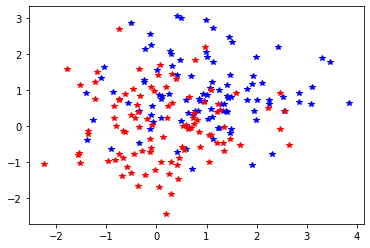

In [3]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+1
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

x=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
X=x
print(X.shape)

print(y.shape)


plt.plot(x[0,:100],x[1,:100],'b*')
plt.plot(x[0,100:],x[1,100:],'r*')

In [5]:
import torch
import torch.nn as nn
from torch import optim
from torch.optim.lr_scheduler import StepLR
class Net(nn.Module):
    def __init__(self,ni,nh,no):
        super(Net,self).__init__()
        self.l1=nn.Linear(ni,nh)
        self.l2=nn.Linear(nh,no)

    def forward(self,x):
        x=torch.sigmoid(self.l1(x))
        x=torch.sigmoid(self.l2(x))
        return x

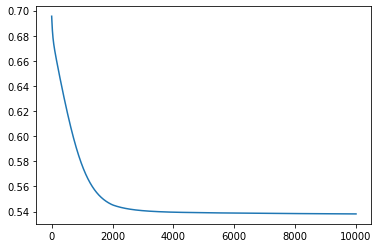

In [13]:
ni,nh,no=2,10,1
lr=0.01
model=Net(ni,nh,no)
ls=[]
loss_fn=nn.BCELoss()
optimizer=optim.SGD(model.parameters(),lr=lr,momentum=0.5)
scheduler=StepLR(optimizer,step_size=2000,gamma=0.8)
num_epoches=10000

X_=torch.Tensor(X.T)
y_=torch.Tensor(y.T)

for i in range(num_epoches):
    optimizer.zero_grad()
    yhat=model(X_)
    loss=loss_fn(yhat,y_)

    loss.backward()
    optimizer.step()
    scheduler.step()
    ls.append(loss.item())

plt.plot(ls)


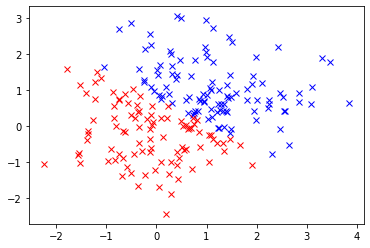

In [14]:
plotClass(X,yhat.detach().numpy().T>0.5,'x')